In [1]:
import torch
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv
load_dotenv()
print(os.environ['INFUSION_DATASETS'])

import revert
import revert.models as rm
from revert import infusion

/home/oli/revert/datasets/icp


# Pulse extraction

This notebook describes the pulse segmentation and selection pipeline, implemented in [scripts-infusion/extract_pulses.py](https://github.com/opeltre/revert/scripts-infusion/extract_pulses.py). It was used to produce some of the figures published in _Brain and Spine_.

inf_20170201124255_INF2


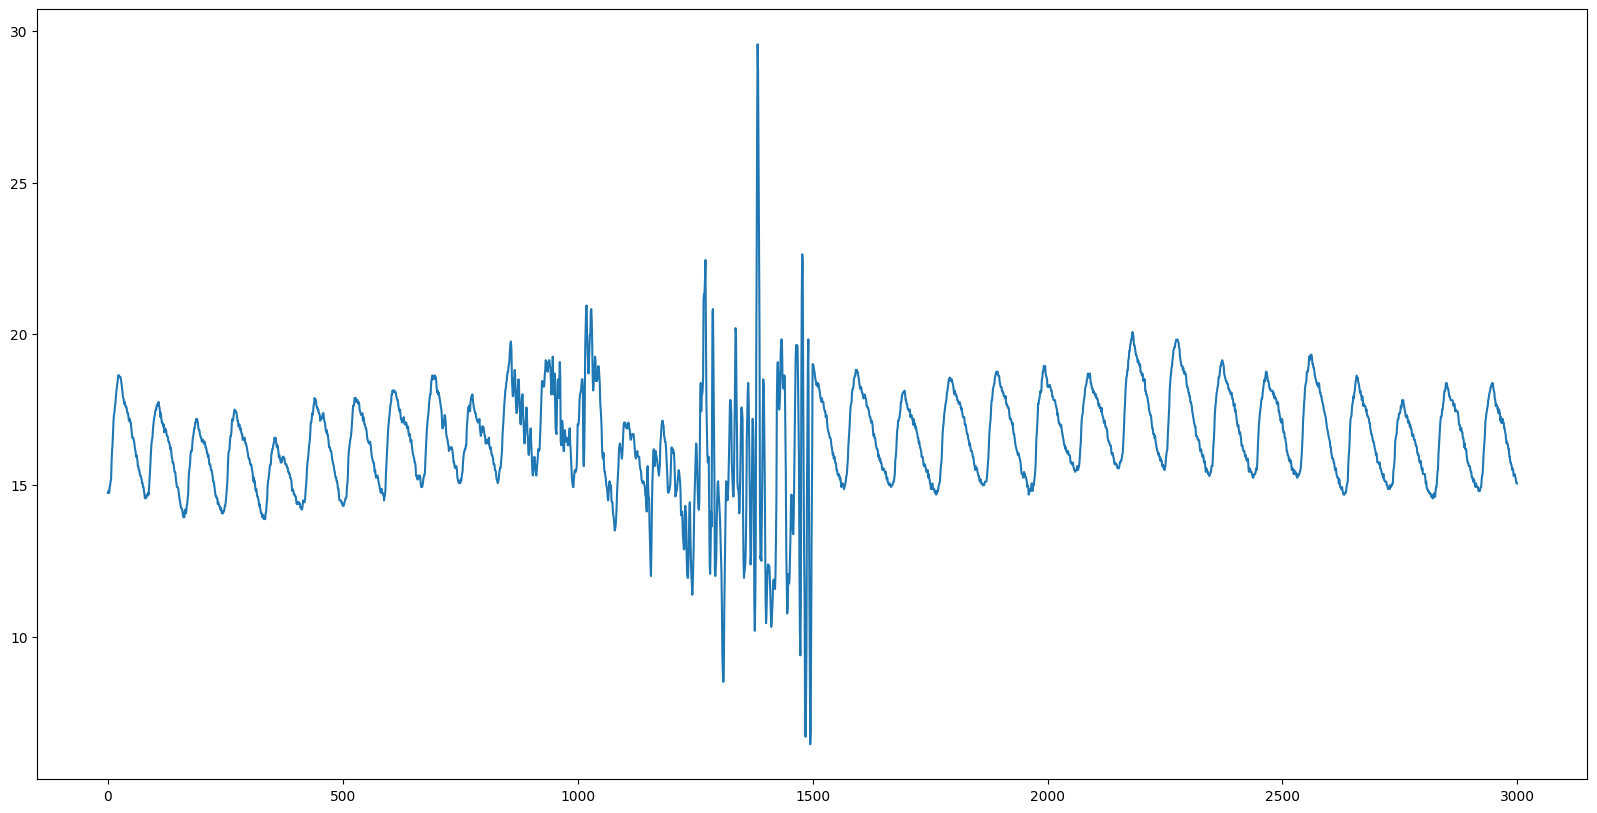

In [26]:
""" Load ICP portion from file """

db = infusion.Dataset('no_shunt')
f = db.get(190)
print(f.key)

minutes = .5
fs      = 100
Npts    = int(minutes * 60 * fs)

icp = f.icp(Npts)

plt.figure(figsize=(20, 10))
plt.plot(icp)
plt.savefig('img/raw_icp.svg')

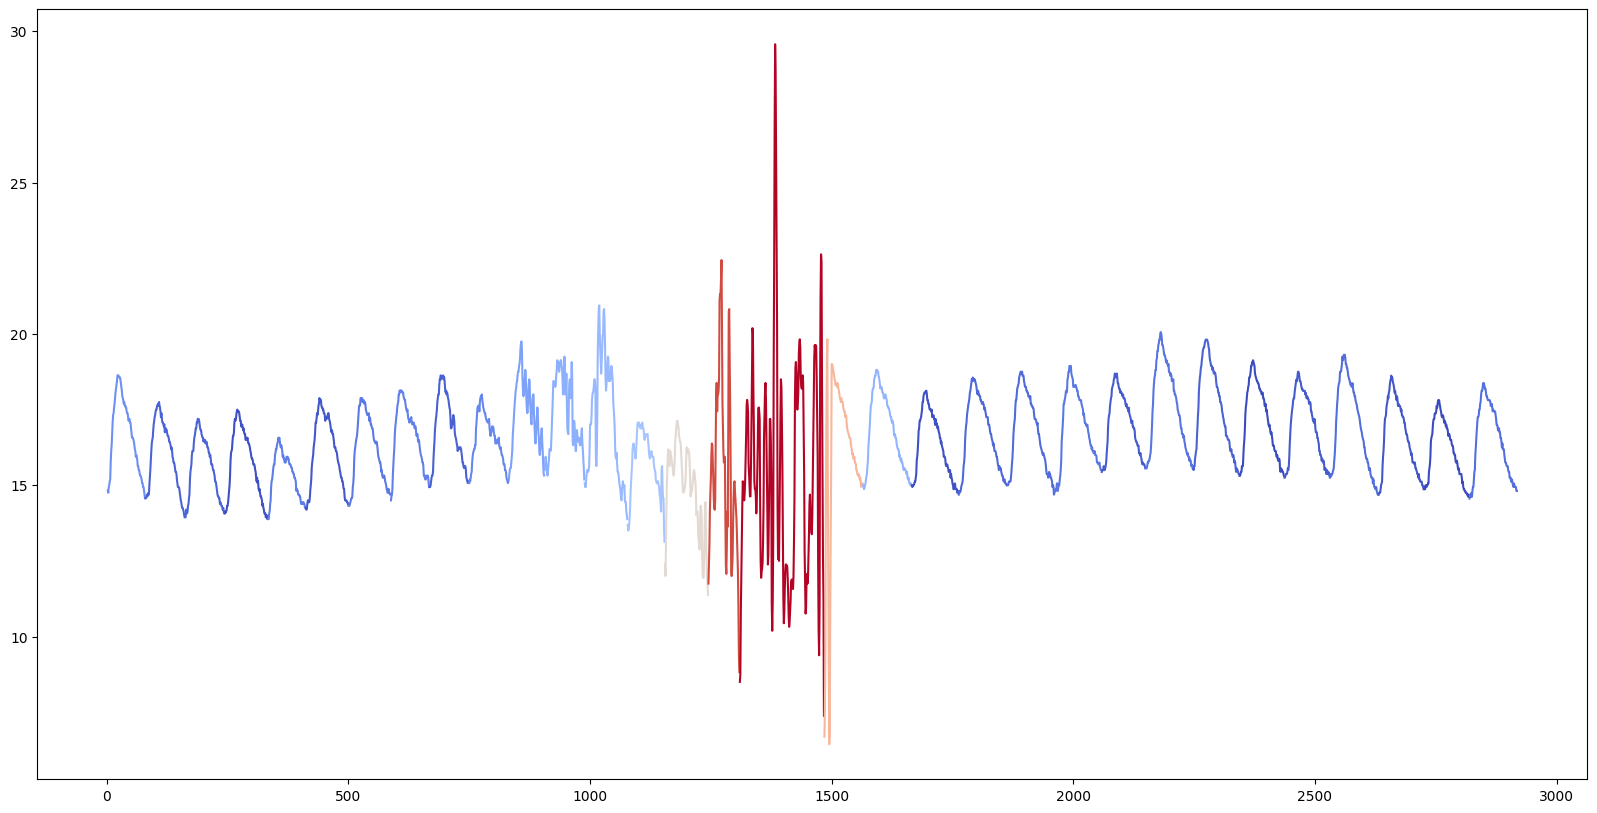

In [27]:
extractPulses = infusion.ExtractPulses(minutes=minutes)

x_all, masks_all, cuts = extractPulses.extract_pulses(icp)
loss_x = extractPulses.loss(x_all)
color = (loss_x - loss_x.min()) / (loss_x.max() - loss_x.min())


plt.figure(figsize=(20, 10))
for i, begin, end in zip(range(x_all.shape[0]), cuts[:-1], cuts[1:]):
    plt.plot(torch.arange(begin, end), 
             icp[begin:end], 
             c=plt.cm.coolwarm(color[i]))
plt.savefig('img/icp_loss.svg')


ValueError: array([[0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.26638147, 0.35330441, 0.80163732, 1.        ],
       [0.28527278, 0.38012942, 0.82346855, 1.        ],
       [0.30417429, 0.40694488, 0.84526273, 1.        ],
       [0.32371842, 0.43315844, 0.86472236, 1.        ],
       [0.34327752, 0.45935363, 0.88412192, 1.        ],
       [0.3634608 , 0.48478368, 0.90101889, 1.        ],
       [0.38885187, 0.51629844, 0.92137348, 1.        ],
       [0.4096111 , 0.54075851, 0.93554472, 1.        ],
       [0.43050689, 0.56488274, 0.94888942, 1.        ],
       [0.45173856, 0.58818099, 0.96020127, 1.        ],
       [0.47307017, 0.61107744, 0.97063359, 1.        ],
       [0.49463849, 0.63302226, 0.97898282, 1.        ],
       [0.5162603 , 0.65449761, 0.9864074 , 1.        ],
       [0.53800422, 0.67490159, 0.99172189, 1.        ],
       [0.56518158, 0.69943844, 0.99663507, 1.        ],
       [0.586921  , 0.71812131, 0.99887411, 1.        ],
       [0.60854736, 0.73572523, 0.99935383, 1.        ],
       [0.63008853, 0.75251624, 0.99850801, 1.        ],
       [0.65139784, 0.76812149, 0.99589115, 1.        ],
       [0.67253795, 0.78286145, 0.9919819 , 1.        ],
       [0.69332128, 0.79631413, 0.98630778, 1.        ],
       [0.71385249, 0.80885714, 0.97938649, 1.        ],
       [0.73882599, 0.82257162, 0.96826106, 1.        ],
       [0.75853883, 0.83278659, 0.95840785, 1.        ],
       [0.77737753, 0.84092121, 0.9461493 , 1.        ],
       [0.79606387, 0.84869321, 0.93347147, 1.        ],
       [0.81369258, 0.85428184, 0.9184801 , 1.        ],
       [0.83114823, 0.85951319, 0.90311016, 1.        ],
       [0.84736491, 0.86247248, 0.88554047, 1.        ],
       [0.86742764, 0.8643766 , 0.86260246, 1.        ]]) is not a valid value for color

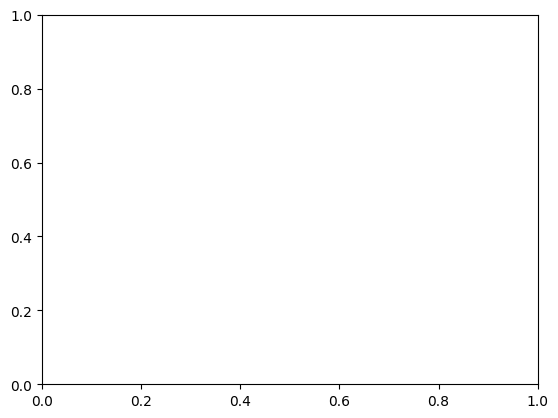

In [30]:
xs, masks = extractPulses(icp)
color = torch.linspace(0, .5, xs.shape)
plt.plot(xs[:12].T, color=plt.cm.coolwarm(torch.linspace(0, .5, xs.shape[0])))


In [23]:
datadir = os.environ['INFUSION_DATASETS']
pulse_data = torch.load(os.path.join(datadir, 'baseline-no_shunt.pt'))
print(list(pulse_data.keys()))

['masks', 'pulses', 'means', 'slopes', 'keys', 'y_quant', 'amp', 'errors']
